# Assignment 1:


# Question 1 : Assessment of Data and applying Normalization

In [29]:
# Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import io
from scipy import stats
from sklearn import neighbors
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [30]:
# Columns of Dataset
# Uploading  the Data set
ab = pd.read_csv('abalone.csv')
A= ['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']
ab.columns=A

Importing the given dataset abalone

# Question 1.1 Is there any missing Data?

In [31]:
# Missing Data 
ab.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

No, there is no data missing for this dataset. To check the same, we used isnull() method. As we can see that the result for each parameter is zero, we can conclude that there is no missing data. Along with the isnull() we could also observe the same pattern using the scatterplot.

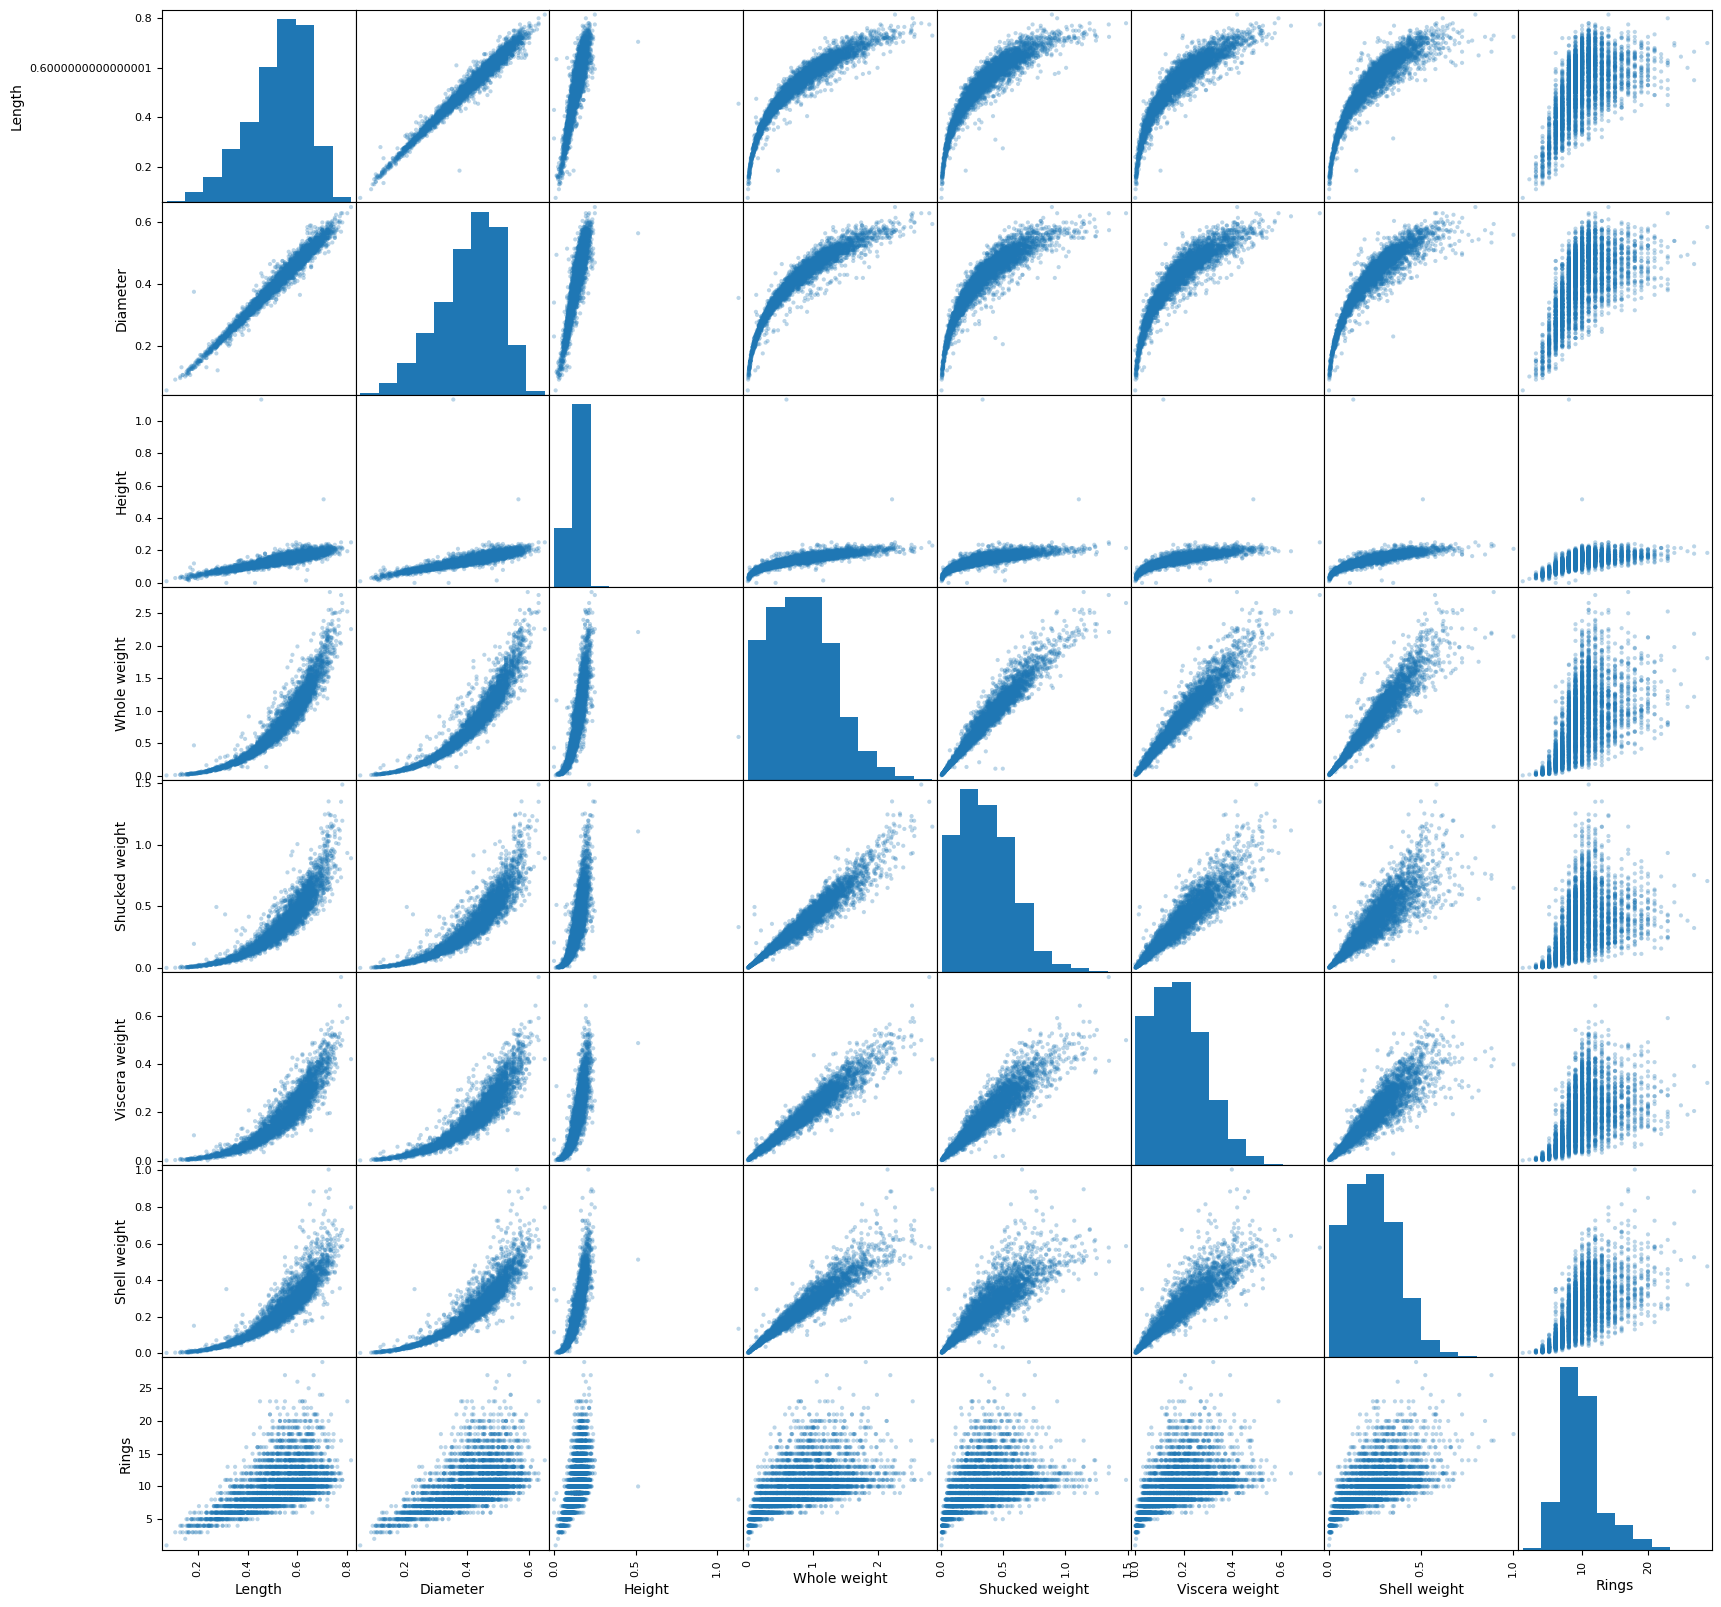

In [32]:
splot = pd.plotting.scatter_matrix(ab, alpha=0.3, figsize=(20,20))

Using the scatter plot, we can not determine any hidden holes, hence we can conclude that there is no missing data.

# Question 1.2 Compute the moments and summarization statistics on the data features

In [33]:
#Inorder to find mean of individual features - describe() 
ab.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4176.000000,4176.000000,4176.000000,4176.000000,4176.00000,4176.000000,4176.000000,4176.000000
mean,0.524009,0.407892,0.139527,0.828818,0.35940,0.180613,0.238852,9.932471
std,0.120103,0.099250,0.041826,0.490424,0.22198,0.109620,0.139213,3.223601
min,0.075000,0.055000,0.000000,0.002000,0.00100,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.18600,0.093375,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799750,0.33600,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153250,0.50200,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.48800,0.760000,1.005000,29.000000


In [34]:
#variance of features
variance=ab.var()
print(variance)

Length             0.014425
Diameter           0.009850
Height             0.001749
Whole weight       0.240515
Shucked weight     0.049275
Viscera weight     0.012017
Shell weight       0.019380
Rings             10.391606
dtype: float64


In [35]:
#Median of features
median = ab.median()
print(median)

Length            0.54500
Diameter          0.42500
Height            0.14000
Whole weight      0.79975
Shucked weight    0.33600
Viscera weight    0.17100
Shell weight      0.23400
Rings             9.00000
dtype: float64


Using describe(), var(), median() method we got the mean, median and variance for particular features

In [36]:
#Skewness of data features
sknss = ab.skew()
print(sknss)

Length           -0.640240
Diameter         -0.609457
Height            3.129241
Whole weight      0.530576
Shucked weight    0.718724
Viscera weight    0.591463
Shell weight      0.620547
Rings             1.115157
dtype: float64


For a distribution, if the value of skewness is < -1 or > 1 than the distribution is highly skewed. If it is -1 < skewness < -0.5 or 0.5 < skewness < 1, the distribution is moderately skewed Else -0.5 < skewness < 0.5 then the distribution is approximately symmetric.

In this dataset; 'Rings' and 'Height' are highly skewed, rest all are moderately skewed.

Note: High skewness means a distribution curve has a shorter tail on one end a distribution curve and a long tail on the other. The data set follows a normal distribution curve; however, higher skewed data means the data is not evenly distributed.


In [37]:
#Kurtosis for the data features
kurts = ab.kurtosis()
print(kurts)

Length             0.064698
Diameter          -0.045675
Height            76.046000
Whole weight      -0.024136
Shucked weight     0.594448
Viscera weight     0.083574
Shell weight       0.531350
Rings              2.335940
dtype: float64


For a distribution having kurtosis 3, then it is known as the mesokurtic, kurtosis > 3 it is known as leptokurtic and kurtosis < 3 platykurtic.

From above, we could clearly see that only 'Height' is Leptokurtic, rest all are Platykurtic.

In [38]:
#unique value for each feature
# The nunique() method returns the number of unique values for each column.
ab.nunique()

Sex                  3
Length             134
Diameter           111
Height              51
Whole weight      2429
Shucked weight    1515
Viscera weight     880
Shell weight       926
Rings               28
dtype: int64

In [39]:
#The info() method prints information about the DataFrame. The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).
ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4176 non-null   object 
 1   Length          4176 non-null   float64
 2   Diameter        4176 non-null   float64
 3   Height          4176 non-null   float64
 4   Whole weight    4176 non-null   float64
 5   Shucked weight  4176 non-null   float64
 6   Viscera weight  4176 non-null   float64
 7   Shell weight    4176 non-null   float64
 8   Rings           4176 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


<AxesSubplot: >

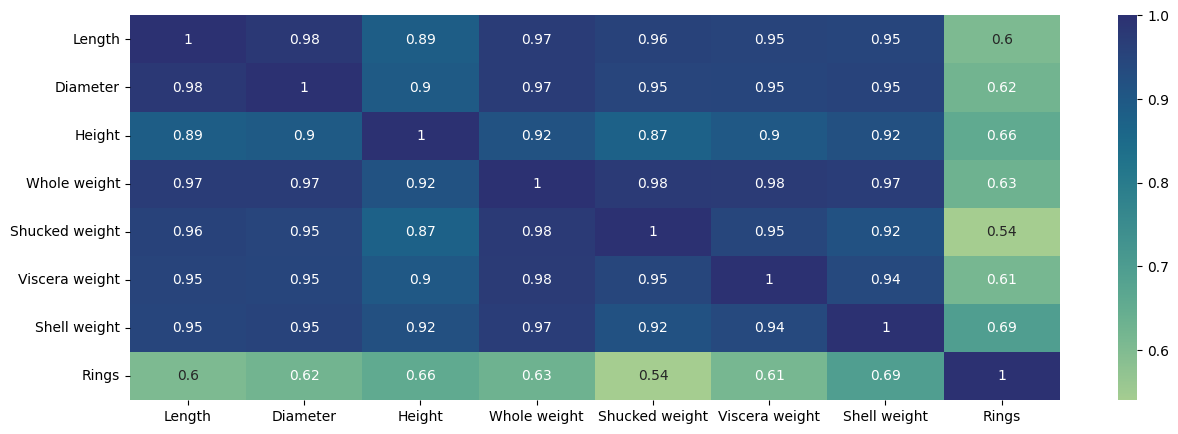

In [40]:
#Correlation between two features : 
plt.figure(figsize=(15,5))
sns.heatmap(ab.corr(method="spearman"), annot=True, cmap="crest")

Highlighting different features

We can observe that Rings are highly corelated with the shell weight with corelation coefficient 0.69. Moreover, Diameter & length, whole weight with shucked weight & viscera weight are almost linearly correlated with the corelation coefficient 0.98.

# Question 1.3 Use a pairsplot to look at the whole Dataset. Choose a subset, just some features and show it in report to highlight some features that seems important.

Text(0.5, 1.0, 'Percentage distribution of Sex')

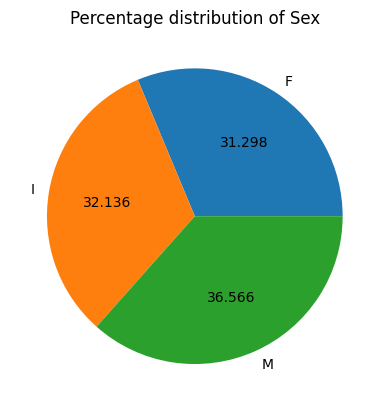

In [41]:
#Categorical analysis
ab.groupby('Sex').size().plot(kind='pie', autopct='%.3f')
plt.ylabel("")
plt.title("Percentage distribution of Sex")

We find that all three categories - M,F,I are almost equally distributed among the dataset with a little extra records for the M category.

In, order to compare any two features together and see their relations with each other, we got percentage distribution of sex for the dataset. Following this, we would take pair plots on the basis of the 'Sex' category column for all other features

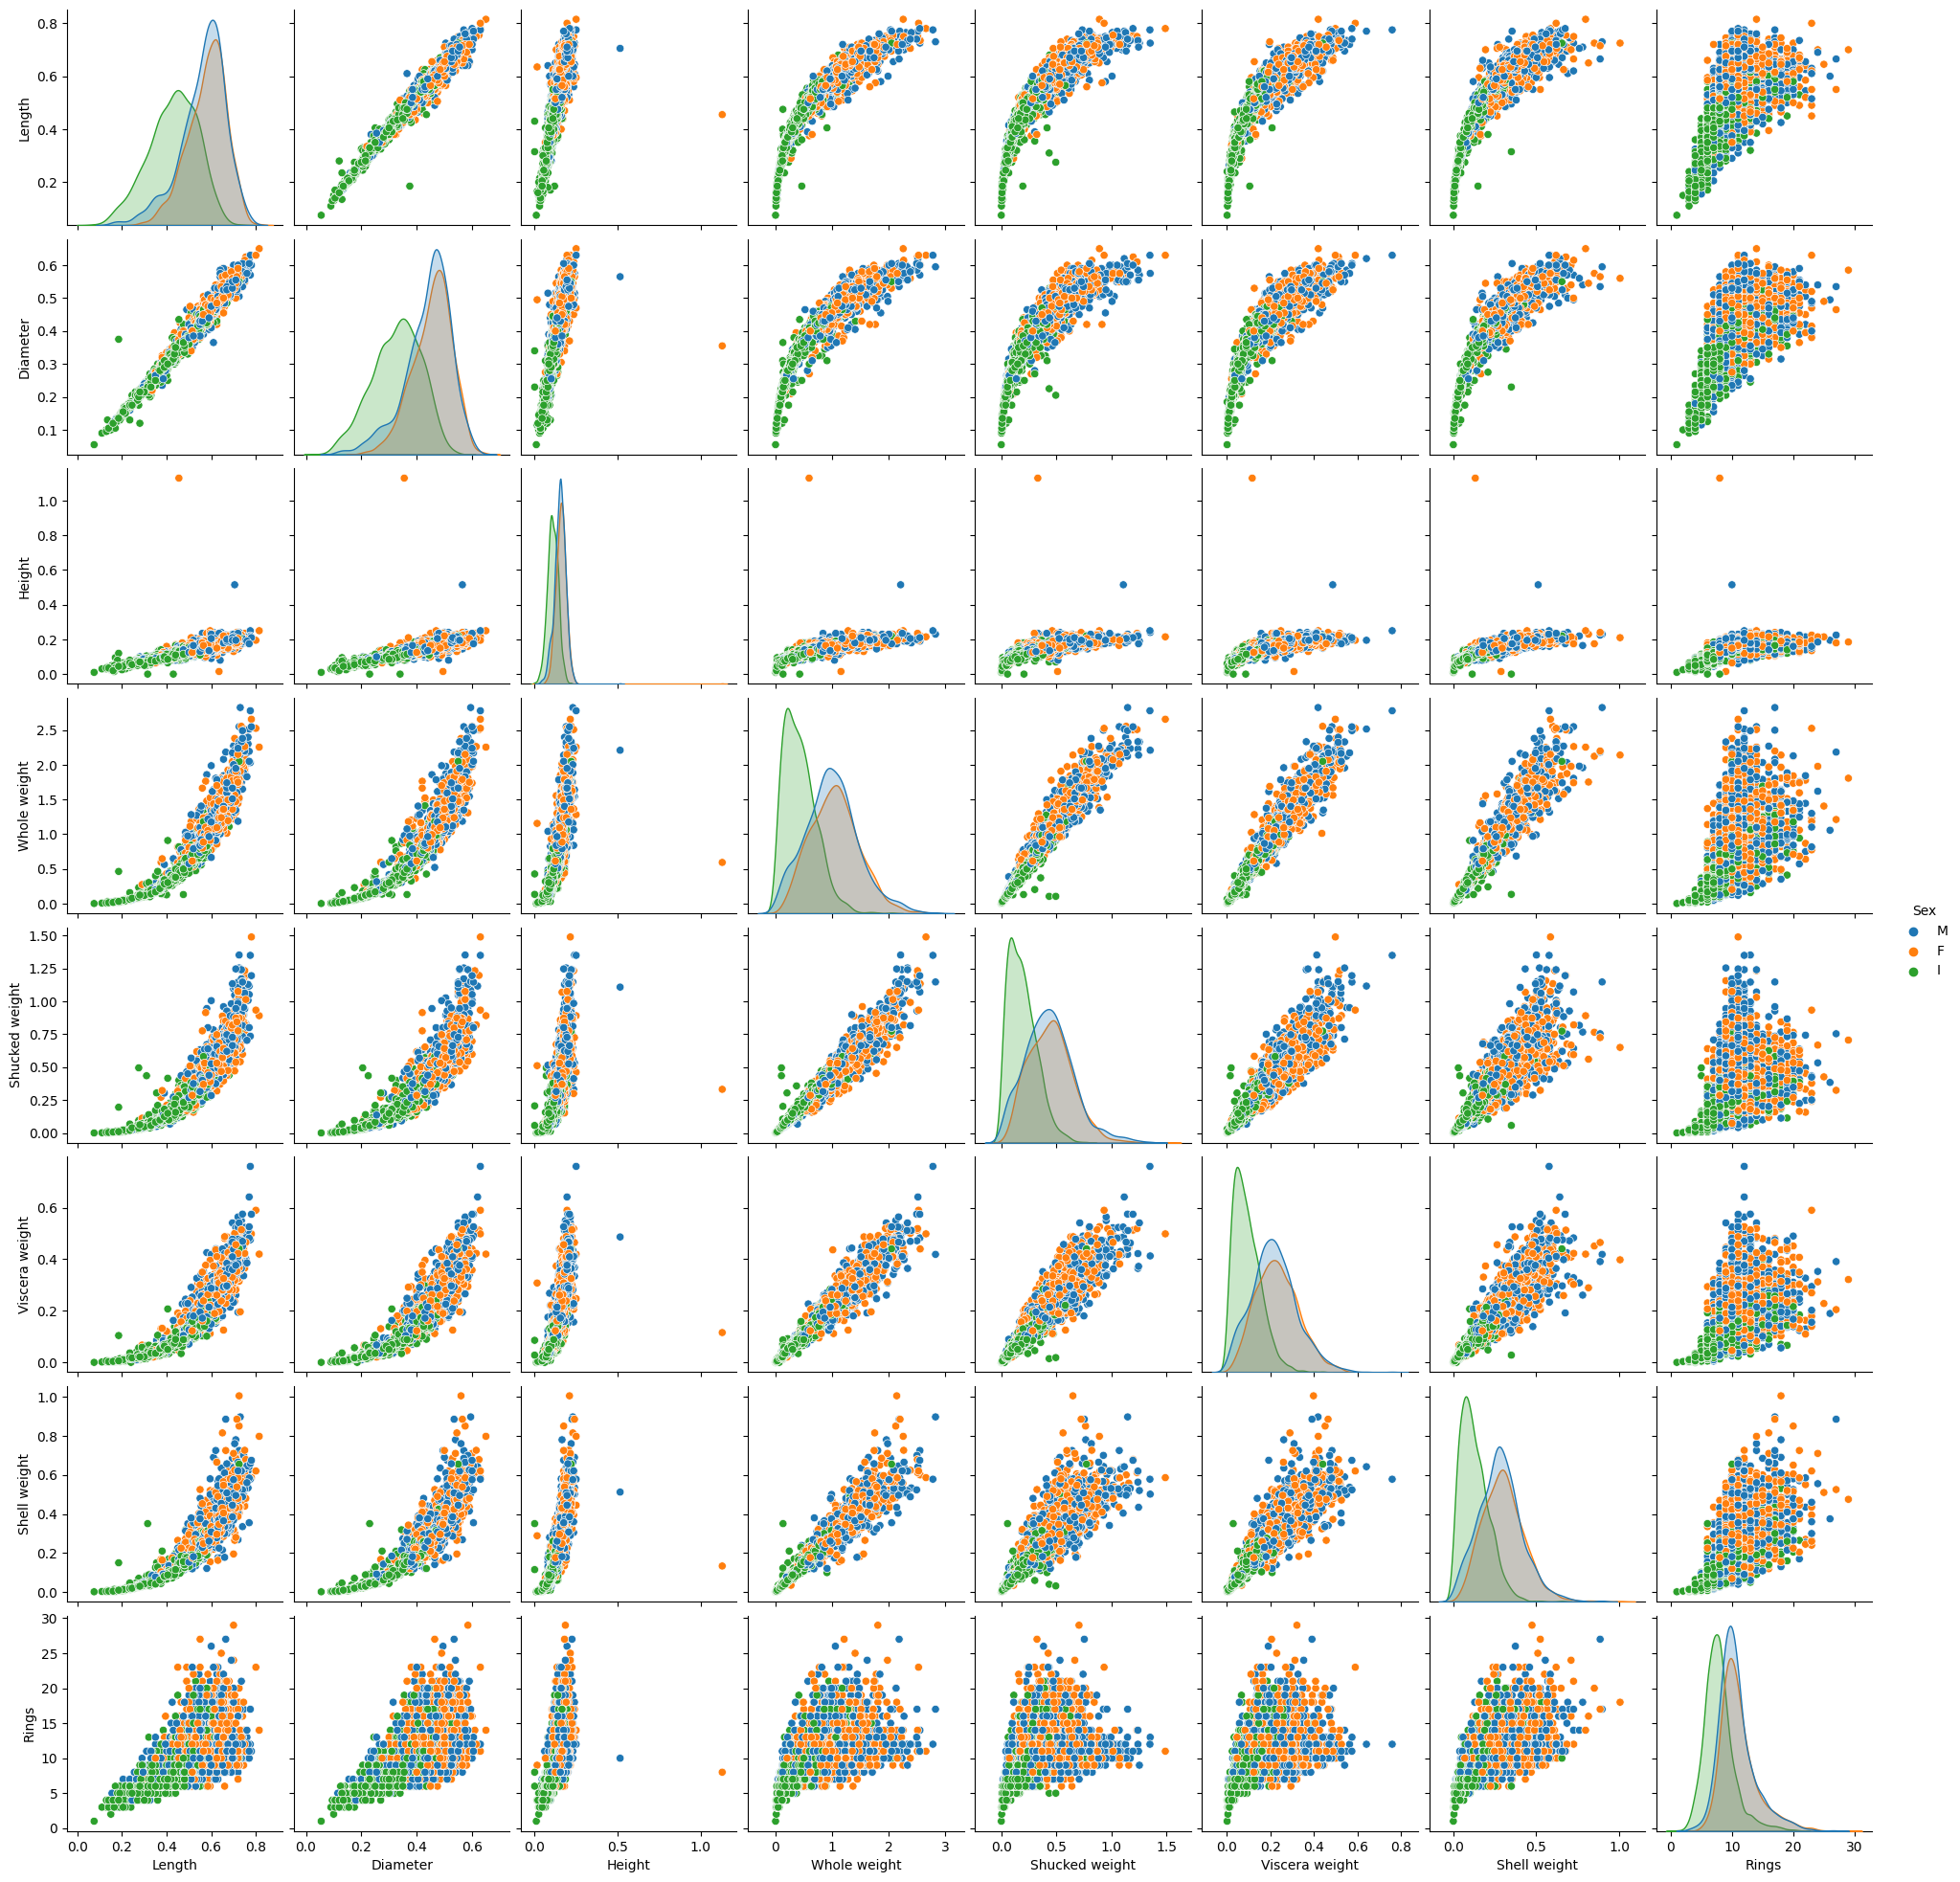

In [42]:
# Plotting the Pair-plots for all numerical columns w.r.t. each other categorised by the sex column
sns.pairplot(ab, hue="Sex", vars=('Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings'))

By looking at the pairplots, we can see that some fields like whole weight, shucked weight, viscera weight and shell weight are correlated because they are creating an almost linear graph when they are plotted together on a graph. The fields Length and Diameter are also closely correlated because they have a perfect linear graph when plotted together.

The pair plots showed the correlation quite strongly but to emphasize it more prominently we shall make a heatmap to find very clearly what fields are correlated

<AxesSubplot: >

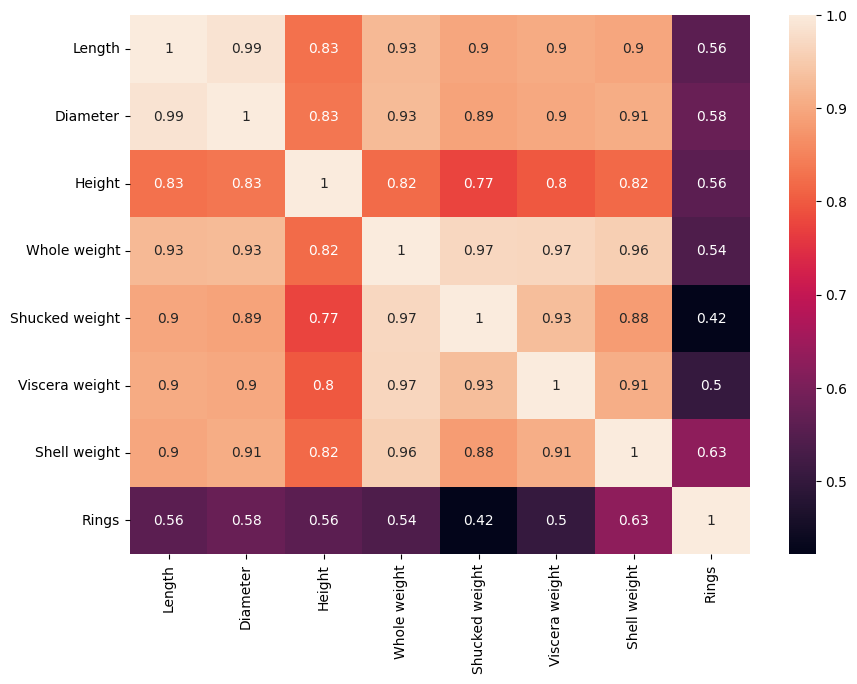

In [43]:
plt.figure(figsize=(10,7))
sns.heatmap(ab.corr(method='pearson'),annot=True)

From the pairplots, the weight categories are correlated but the diameter and length are highly correlated.



In [44]:
#Creating a function to plot similar Histogram for showing distribution according to category for different features
def plot_histogram_against_sex(field, b): 
    plt.figure(figsize=(10,3))
    sns.distplot(ab.loc[ab['Sex']=='M'][field],bins=b,kde=True,label="M")
    sns.distplot(ab.loc[ab['Sex']=='F'][field],bins=b,kde=True,label="F")
    sns.distplot(ab.loc[ab['Sex']=='I'][field],bins=b,kde=True,label="I")
    plt.legend()
    plt.title("Histogram distribution for {} according to Sex".format(field))
    plt.xlabel(field)
    plt.ylabel("Frequency Distribution")
    plt.show()

Then, we move on to exploring range and distribution frequency of various features on the basis of sex. We are doing that by plotting histograms for the features. We are plotting histograms because this is singular feature analysis.

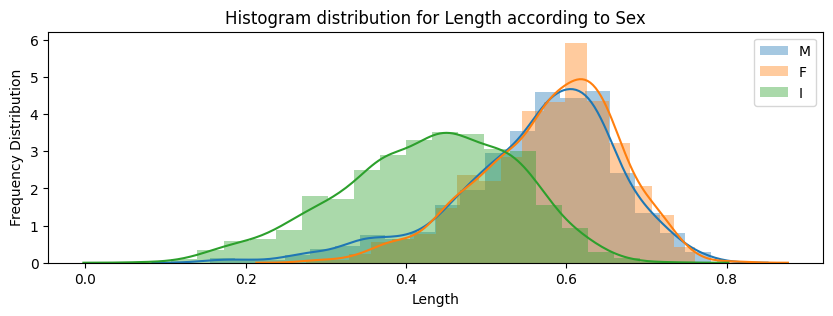

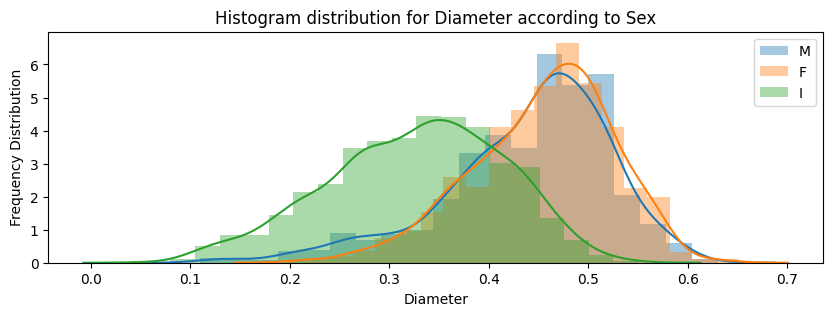

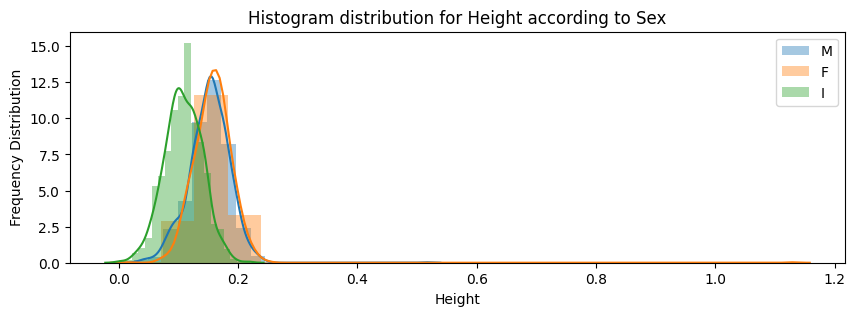

In [45]:
plot_histogram_against_sex("Length",20) # Histogram of length on basis of sex
plot_histogram_against_sex("Diameter",20) # Histogram of diameter on basis of sex
plot_histogram_against_sex("Height",20) # Histogram of height on basis of sex

#Weight measurements analysis

Now, we explore the weight categories similarly using the histogram plot.

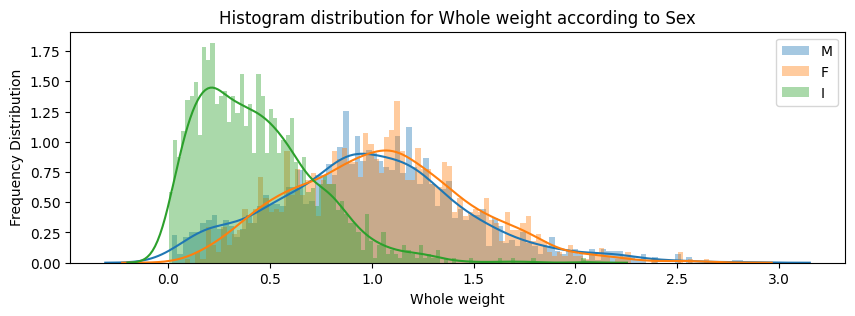

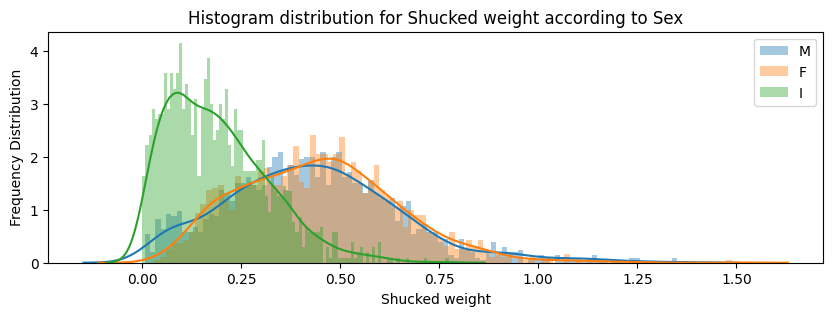

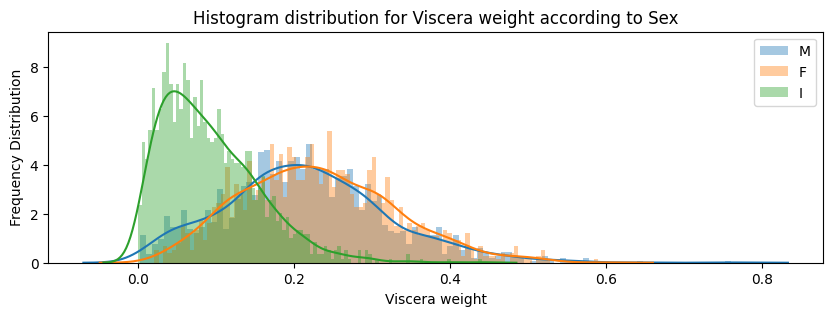

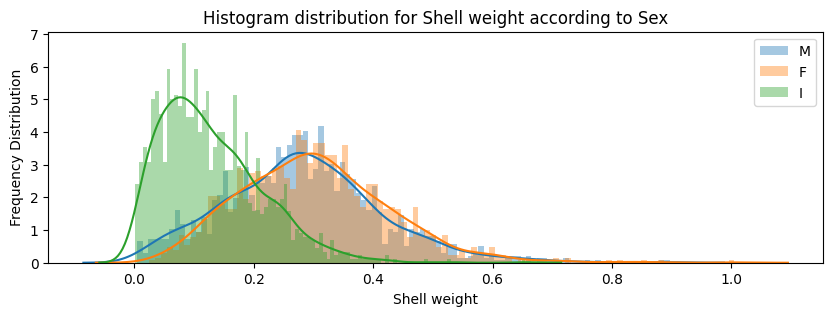

In [46]:
plot_histogram_against_sex("Whole weight",100) # Histogram of Whole weight on basis of sex
plot_histogram_against_sex("Shucked weight",100) # Histogram of Shucked weight on basis of sex
plot_histogram_against_sex("Viscera weight",100) # Histogram of Viscera weight on basis of sex
plot_histogram_against_sex("Shell weight",100) # Histogram of Shell weight on basis of sex

As'Rings' is the target parameter, we have explored the frequency distribution separately.

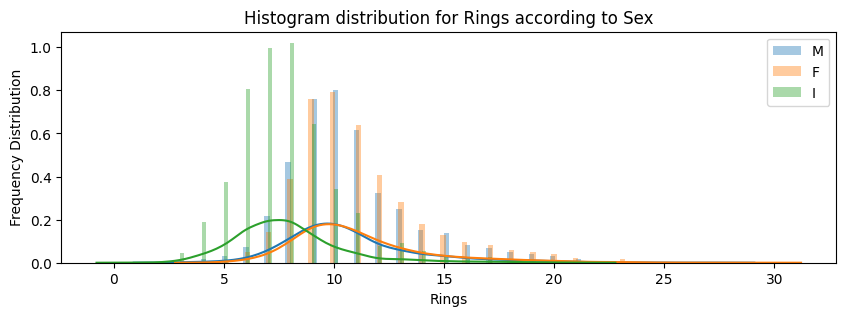

In [47]:
# Histogram of Rings on basis of sex
plot_histogram_against_sex("Rings",100) 

# Question 1.4 Is this a balanced data?

To check for the balance in the dataset, we will plot a count plot to see the distribution. If it is a proper bell curve, then it is a balanced set, otherwise it is not.

In [48]:
#Check of Balance Dataset
ab.Sex.unique()
ab['Sex'] = ab['Sex'].replace(['M'],'0')
ab['Sex'] = ab['Sex'].replace(['F'],'1')
ab['Sex'] = ab['Sex'].replace(['I'],'2')

<AxesSubplot: xlabel='Rings', ylabel='count'>

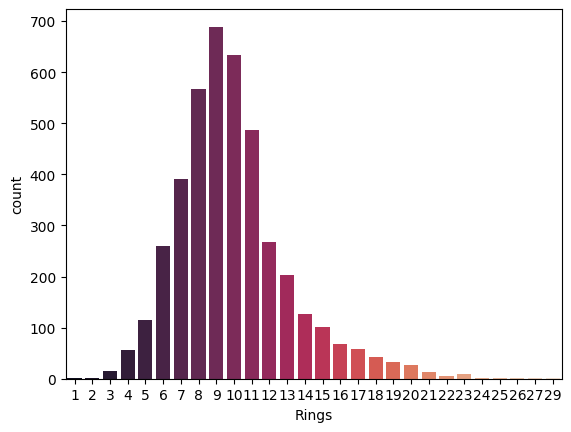

In [49]:
sns.countplot(x=ab['Rings'],data=ab,palette='rocket')

From the plot we can clearly see that it is not make a proper bell curve due to skewness but it is a negligible so we can still use it as a balanced dataset

<AxesSubplot: xlabel='Diameter', ylabel='count'>

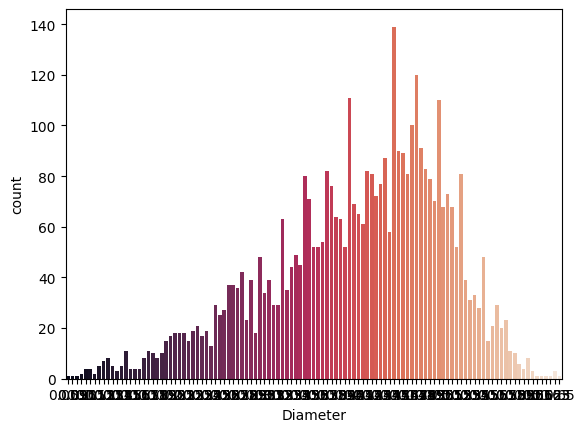

In [50]:
sns.countplot(x=ab['Diameter'],data=ab,palette='rocket')

For a diameter feature we can clearly see that it is not a proper bellcurve so this is unbalanced data and to correct this basically sampling techniques are used to improve performance

# Question 1.5 Normalize the data using z-score normalization as a preprocessing step

# Before Normalization

First we have plot histogram plot for shape and range for different features individually

array([[<AxesSubplot: title={'center': 'Length'}>,
        <AxesSubplot: title={'center': 'Diameter'}>,
        <AxesSubplot: title={'center': 'Height'}>],
       [<AxesSubplot: title={'center': 'Whole weight'}>,
        <AxesSubplot: title={'center': 'Shucked weight'}>,
        <AxesSubplot: title={'center': 'Viscera weight'}>],
       [<AxesSubplot: title={'center': 'Shell weight'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

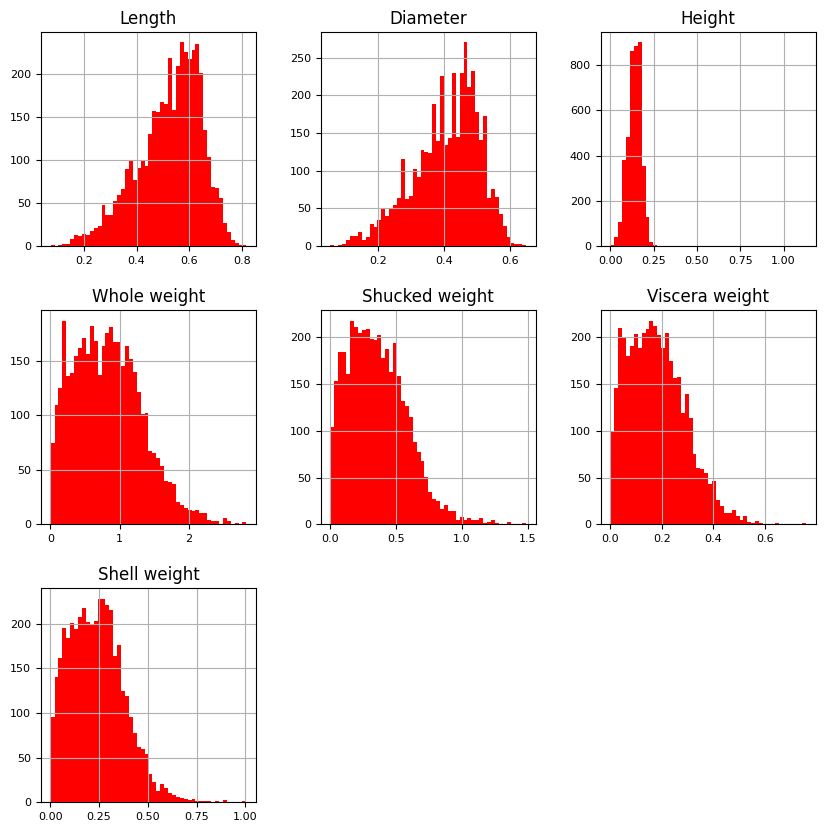

In [51]:
ab_for_normalization = ab.drop(columns=['Rings','Sex'])
ab_for_normalization.hist(figsize=(10, 10), bins=50, xlabelsize=8, ylabelsize=8, color="red")



# After Z-score Normalization

Z-score normalization refers to the process of normalizing every value in a dataset such that the mean of all of the values is 0 and the standard deviation is 1.

We use the following formula to perform a z-score normalization on every value in a dataset:

New value = (x – μ) / σ

where:

x: Original value μ: Mean of data σ: Standard deviation of data

array([[<AxesSubplot: title={'center': 'Length'}>,
        <AxesSubplot: title={'center': 'Diameter'}>,
        <AxesSubplot: title={'center': 'Height'}>],
       [<AxesSubplot: title={'center': 'Whole weight'}>,
        <AxesSubplot: title={'center': 'Shucked weight'}>,
        <AxesSubplot: title={'center': 'Viscera weight'}>],
       [<AxesSubplot: title={'center': 'Shell weight'}>, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

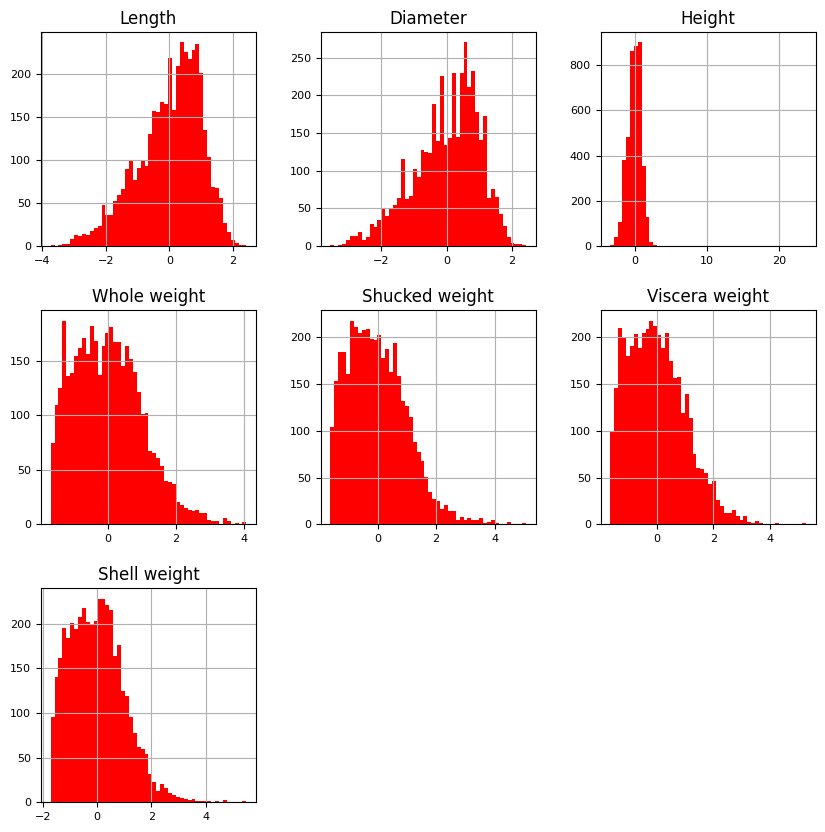

In [52]:
# With Z-score Normalization
ab_zscore = ab_for_normalization.apply(stats.zscore)
ab_zscore.hist(figsize=(10, 10), bins=50, xlabelsize=8, ylabelsize=8,color="red")

The histogram of each columns with and without normalization the shape of graph remains almost same but the value around the centered datapoints are slightly changed

In [53]:
# Plot one feature value, sorted from low to high, against two others
x=['Diameter']; y=['Whole weight','Shell weight']

In [54]:
ab_zscore['Rings'] = ab['Rings']
ab_zscore['Sex'] = ab['Sex']
ab_zscore.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex
0,-1.449007,-1.439892,-1.184252,-1.230344,-1.170967,-1.205327,-1.213054,7,0
1,0.049892,0.122015,-0.108247,-0.309601,-0.463610,-0.356844,-0.207277,9,1
2,-0.699558,-0.432210,-0.347360,-0.637928,-0.648334,-0.607739,-0.602404,10,0
3,-1.615552,-1.540661,-1.423364,-1.272150,-1.216022,-1.287438,-1.320816,7,2
4,-0.824466,-1.087204,-1.064696,-0.973393,-0.983991,-0.940746,-0.853848,8,2


In [55]:
ab_temp = ab_zscore[x+y]
ab_temp.sort_values(by=x, inplace=True)
display(ab_temp.describe())

,Diameter,Whole weight,Shell weight
count,4.176000e+03,4176.000000,4176.000000
mean,2.177909e-16,0.000000,0.000000
std,1.000120e+00,1.000120,1.000120
min,-3.556025e+00,-1.686127,-1.705166
25%,-5.833625e-01,-0.789856,-0.782007
50%,1.723991e-01,-0.059277,-0.034858
75%,7.266242e-01,0.661614,0.647633
max,2.439684e+00,4.071831,5.504099


<Figure size 640x480 with 0 Axes>

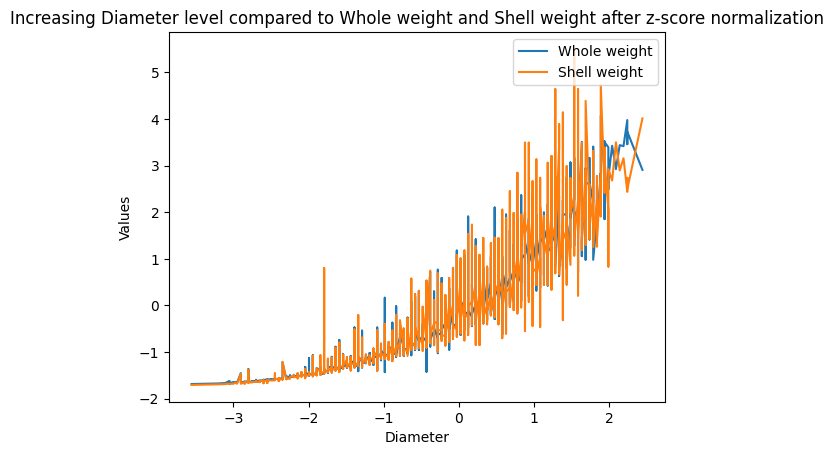

In [56]:
plt.figure()
ab_temp.sort_values(by=x, inplace=True)
ab_temp.plot(x=x[0], y=y)
plt.legend(loc='upper right')
plt.title('Increasing {} level compared to {} and {} after z-score normalization'.format(x[0],y[0],y[1]))
plt.xlabel('Diameter')
plt.ylabel('Values')
plt.legend(loc='upper right')